In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
original_data=pd.read_csv('D:\education\housing.csv')
original_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
original_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
original_data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
#GRAPHICAL REPRESENTATION OF THE DATA

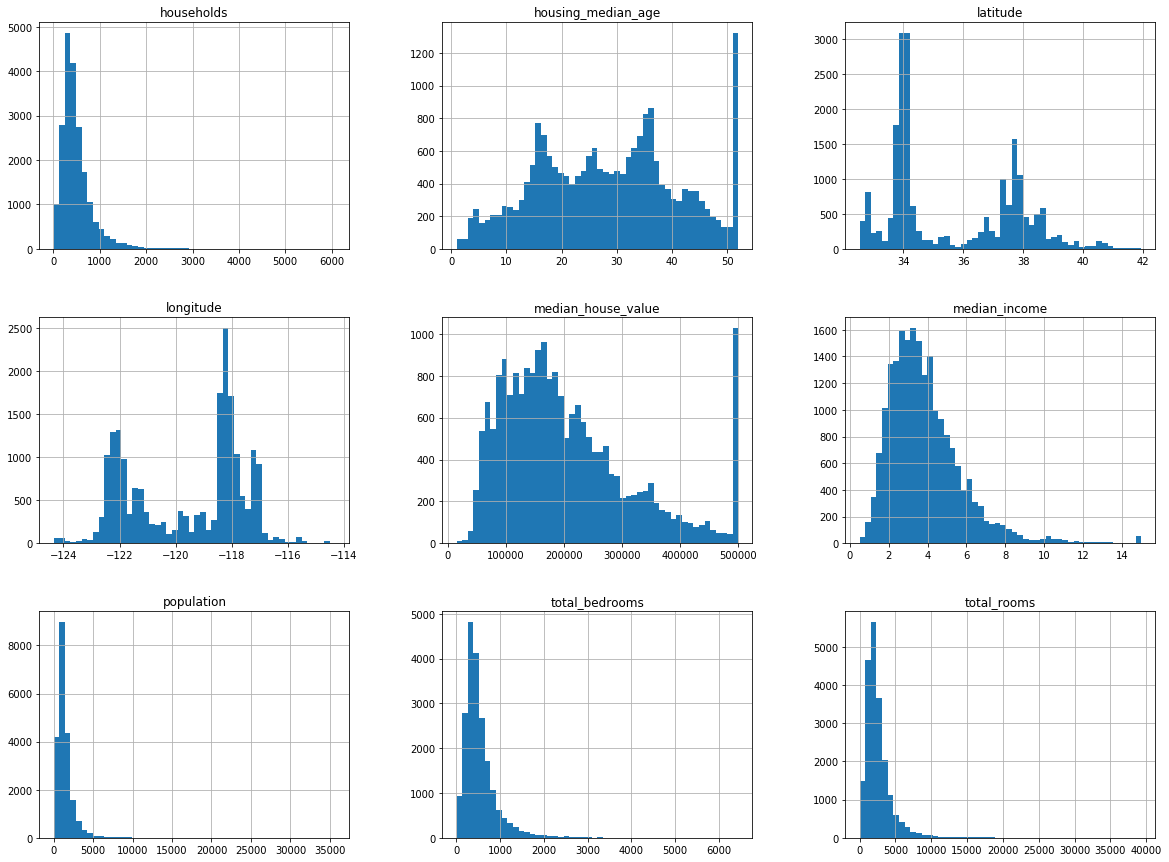

In [7]:
original_data.hist(bins=50,figsize=(20,15))
plt.show()

In [8]:
#Creating a test set

In [9]:
train_set,test_set=train_test_split(original_data, test_size=0.2,random_state=42)
print(len(train_set),"train_set +",len(test_set),"test_set")

#THis method of splitting data is correct if you have a large data set, but in our case it may introduce sampling bias.
#So, we must use stratified sampling

16512 train_set + 4128 test_set


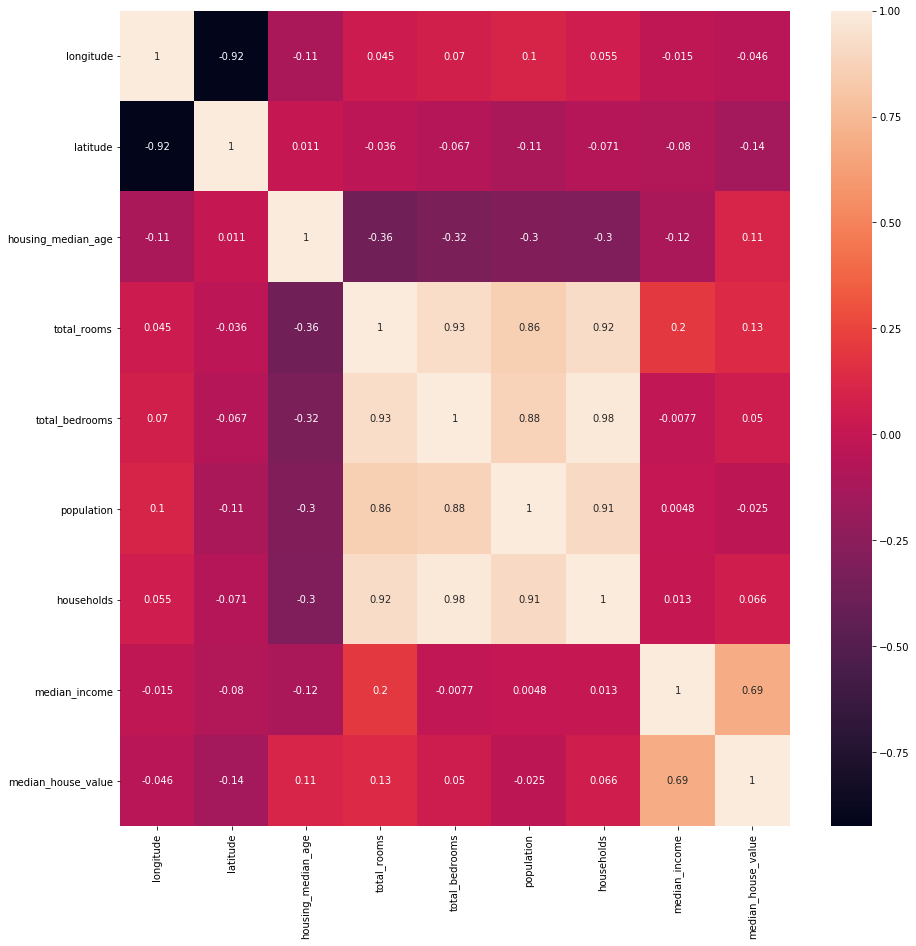

In [10]:
#STRATIFIED SAMPLING
#Step 1 Find Feature that is highly correlated.
data=original_data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(data, annot=True)

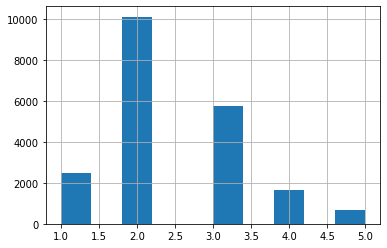

In [11]:
#median_income is the most correlated feature in our data
original_data['inc_cat']=pd.cut(original_data['median_income'], bins=[0.,2.,4.,6.,8.,np.inf],labels=[1,2,3,4,5])
original_data['inc_cat'].hist()

In [12]:
#Step 2 Stratified sample SPlit
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_ind,test_ind in split.split(original_data,original_data['inc_cat']):
    train_set=original_data.loc[train_ind]
    test_set=original_data.loc[test_ind]
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,inc_cat
3700,-118.36,34.19,11.0,2921.0,685.0,1512.0,664.0,4.1445,176400.0,<1H OCEAN,3
20333,-118.99,34.23,9.0,10618.0,1617.0,4830.0,1606.0,6.6246,284200.0,<1H OCEAN,4
19723,-121.67,38.85,46.0,645.0,131.0,410.0,122.0,1.7417,110400.0,INLAND,1
14228,-117.04,32.68,14.0,1320.0,270.0,943.0,260.0,5.0947,152700.0,NEAR OCEAN,3
11027,-117.83,33.80,31.0,2016.0,409.0,1095.0,405.0,3.8681,196000.0,<1H OCEAN,2


In [13]:
#drop the inc_cat because we added that just for stratifiedshuffle.
for set_ in (train_set,test_set):
    set_ .drop('inc_cat',axis=1,inplace=True)
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3700,-118.36,34.19,11.0,2921.0,685.0,1512.0,664.0,4.1445,176400.0,<1H OCEAN
20333,-118.99,34.23,9.0,10618.0,1617.0,4830.0,1606.0,6.6246,284200.0,<1H OCEAN
19723,-121.67,38.85,46.0,645.0,131.0,410.0,122.0,1.7417,110400.0,INLAND
14228,-117.04,32.68,14.0,1320.0,270.0,943.0,260.0,5.0947,152700.0,NEAR OCEAN
11027,-117.83,33.80,31.0,2016.0,409.0,1095.0,405.0,3.8681,196000.0,<1H OCEAN


In [14]:
#Now we have train_set and test_set


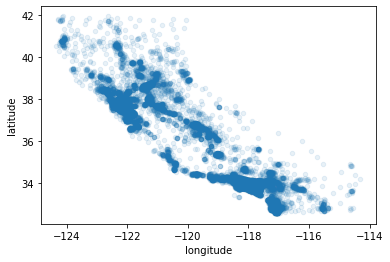

In [15]:
#Visualzie the data to gain more insight
original_data.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

In [16]:
#the above image shows dense areas

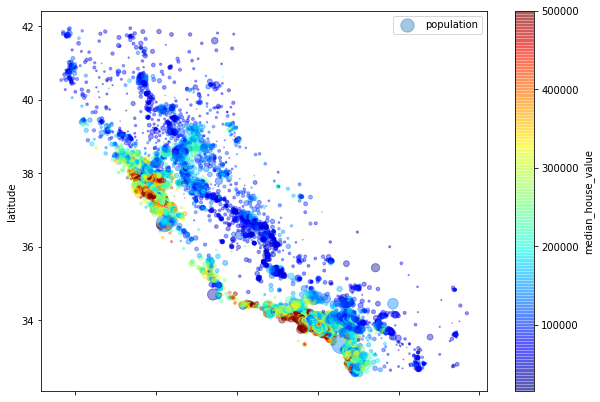

In [17]:
original_data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=original_data["population"]/100, label="population", figsize=(10,7),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [18]:
#This image tells you that the housing prices are very much related to the location (e.g., close to the ocean)
#and to the population density, as you probably knew already

In [19]:
#Prepate data for ML algorithm


In [20]:
copy_train_set_features=train_set.drop('median_house_value',axis=1)
copy_train_set_labels=train_set['median_house_value'].copy()

In [21]:
#DATA CLEANING
copy_train_set_nocat=copy_train_set_features.drop('ocean_proximity', axis=1) #because we cant calculate median of categorical att

In [22]:
#option 1
from sklearn.impute import SimpleImputer
imputer_median=SimpleImputer(missing_values=np.nan , strategy='median')
imputer_median.fit(copy_train_set_nocat)
X=imputer_median.transform(copy_train_set_nocat) 
#X is nump array so convert it back to dataframe
housing_tr=pd.DataFrame(X,columns=copy_train_set_nocat.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.22,37.78,44.0,1678.0,514.0,1700.0,495.0,2.0801
1,-119.68,36.77,21.0,1260.0,182.0,583.0,205.0,6.0132
2,-117.96,33.80,30.0,729.0,131.0,488.0,139.0,4.7667
3,-117.28,32.83,34.0,2392.0,653.0,933.0,619.0,3.7306
4,-122.53,38.32,22.0,3577.0,436.0,1371.0,501.0,5.7950


In [23]:
#housing_tr has no attribue ocean proximity,label and missing values.
#train_set test_set are original split data variables

In [24]:
#Handling categorial attributes

In [25]:
#onehotencoding
from sklearn.preprocessing import LabelBinarizer
ocean_pro=copy_train_set_features['ocean_proximity']
encoder=LabelBinarizer()
ocean_pro_onehot=encoder.fit_transform(ocean_pro)
ocean_pro_onehot

array([[0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0]])

In [26]:
#Note that this returns a dense NumPy array by default. You can get a sparse matrix instead by passing
#sparse_output=True to the LabelBinarizer constructor.

In [27]:
#option 2
#sklearn doesnt handle dataframe so we have to convert it into numpyarray.FOr this purpose we can write custom transformer
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values


In [28]:
num_attributes=list(copy_train_set_nocat) #only numeric attributes
cat_attributes=['ocean_proximity']
from sklearn.preprocessing import OneHotEncoder

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
#pipline
num_pipeline=Pipeline([
    ('selector',DataFrameSelector(num_attributes)),
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
    
])
cat_pipeline=Pipeline([
    ('selector',DataFrameSelector(cat_attributes)),
   
    ('one_hot_encoder', OneHotEncoder(sparse=False))
])

In [30]:
#combine both pipelines
from sklearn.pipeline import FeatureUnion
full_pipeline=FeatureUnion(transformer_list=[
    ('num_pipeline',num_pipeline),
    ('cat_pipeline',cat_pipeline),
    
])

In [31]:
#run complete pipeline
housing_prepared=full_pipeline.fit_transform(copy_train_set_features)#use stratified train dataset without labels
housing_prepared.shape

(16512, 13)

In [32]:
#Apply model
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(housing_prepared,copy_train_set_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
#Predict some values for some data from
some_data=copy_train_set_features.iloc[:5]
some_labels=copy_train_set_labels.iloc[:5]
some_data_prepared=full_pipeline.transform(some_data)
print("predictions",lin_reg.predict(some_data_prepared))
print("labels", list(some_labels))

predictions [165465.70285809 221411.62031001 249329.24189696 275958.37668585
 290433.24874463]
labels [131900.0, 150800.0, 195200.0, 500000.0, 332300.0]


In [34]:
#Calculate RMSE on whole dataset
from sklearn.metrics import mean_squared_error
predicted=lin_reg.predict(housing_prepared)
mse=mean_squared_error(predicted,copy_train_set_labels)
mse=np.sqrt(mse)
print (mse)

68287.30709007155


In [35]:
#this is not a good rmse score it shows our model is underfitting. This can be the result of features not telling alot about data or simple model.
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
dt_predict=tree_reg.fit(housing_prepared,copy_train_set_labels)
dt_predict=tree_reg.predict(housing_prepared)
mse=mean_squared_error(dt_predict,copy_train_set_labels)
rmse=np.sqrt(mse)
print (rmse)

0.0


In [36]:
#As we saw earlier, you don’t want
#to touch the test set until you are ready to launch a model you are confident about, so you need to use part
#of the training set for training, and part for model validation.

In [37]:
#Cross Validation
from sklearn.model_selection import cross_val_score
score=cross_val_score(tree_reg,housing_prepared,copy_train_set_labels,scoring="neg_mean_squared_error",cv=10)

rmse=np.sqrt(-score)

In [38]:
#Scikit-Learn’s cross-validation features expect a utility function
#(greater is better) rather than a cost function (lower is better), so
#the scoring function is actually the opposite of the MSE (i.e., a neg‐
#ative value), which is why the preceding code computes -scores
#before calculating the square root.

In [39]:
#scores
def display_score(score):
    print("score",score)
    print("mean",score.mean())
    print("std",score.std())
display_score(rmse)

score [69629.36080156 64872.08494044 69621.5741462  71325.91686925
 67226.91776632 69358.61798449 69131.44673095 70124.14958989
 68889.182562   70953.39147038]
mean 69113.26428614922
std 1774.4061041683794


In [40]:
#the 0.0 out which we have seen a few blocks up is not correct because of overfitting. The current score is no better than lin_reg model
#decision model is overfitting so badly that it is unerperforming than linear reg model


In [41]:
#lets compute cross validation scores for linear regression
lin_score=cross_val_score(lin_reg,housing_prepared,copy_train_set_labels,scoring="neg_mean_squared_error",cv=10)
lin_score
lin_rmse_score=np.sqrt(-lin_score)
display_score(lin_rmse_score)

score [69335.11571277 67781.81672924 67538.32004251 67221.45951052
 67179.32885355 68423.08456585 70846.8988435  68805.11188851
 68922.50606737 67397.02828043]
mean 68345.0670494249
std 1108.0988716980337


In [42]:
#lin reg is performing better than  decision tree.
from sklearn.ensemble import RandomForestRegressor
random_forest=RandomForestRegressor()
rf_predict=random_forest.fit(housing_prepared,copy_train_set_labels)
#rf_predict=random_forest.predict(housing_prepared)



In [43]:
#score=cross_val_score(random_forest,housing_prepared,copy_train_set_labels,scoring="neg_mean_squared_error",cv=10)

#rmse=np.sqrt(-score)

In [44]:
#display_score(rmse)

In [45]:
#save models andl oad models
from joblib import dump,load
dump(rf_predict,"random_forest.pkl")

['random_forest.pkl']

In [46]:
rf_model=load("random_forest.pkl")
predict=rf_model.predict(housing_prepared)
mse=mean_squared_error(predict,copy_train_set_labels)
rmse=np.sqrt(mse)
rmse

18109.401564814034

In [47]:
score=cross_val_score(rf_model,housing_prepared,copy_train_set_labels,scoring="neg_mean_squared_error",cv=10)

rmse=np.sqrt(-score)

In [48]:
#FINE TUNING

In [56]:
#GRID SEARCH
from sklearn.model_selection import GridSearchCV
param_grid = [
 {'n_estimators': [3, 10, 30,60], 'max_features': [2, 4, 6, 8,10]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]

forest_reg=RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(housing_prepared, copy_train_set_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [57]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 60}

In [58]:
#Since 8 and 30 are the maximum values that were evaluated, you
#should probably try searching again with higher values, since the
#score may continue to improve.
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=60, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [59]:
#Evaluations scores of grid search
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):

    print(np.sqrt(-mean_score), params)

63534.126403027985 {'max_features': 2, 'n_estimators': 3}
55107.59680142386 {'max_features': 2, 'n_estimators': 10}
52225.40114521814 {'max_features': 2, 'n_estimators': 30}
51618.78005421281 {'max_features': 2, 'n_estimators': 60}
59486.82684545195 {'max_features': 4, 'n_estimators': 3}
52321.59995551021 {'max_features': 4, 'n_estimators': 10}
50163.71101626711 {'max_features': 4, 'n_estimators': 30}
49716.95744582716 {'max_features': 4, 'n_estimators': 60}
58192.20935278742 {'max_features': 6, 'n_estimators': 3}
51623.873612164985 {'max_features': 6, 'n_estimators': 10}
49278.044484958315 {'max_features': 6, 'n_estimators': 30}
49105.845212751185 {'max_features': 6, 'n_estimators': 60}
57670.89088820508 {'max_features': 8, 'n_estimators': 3}
51477.50700526614 {'max_features': 8, 'n_estimators': 10}
49511.56136082053 {'max_features': 8, 'n_estimators': 30}
48792.586350760124 {'max_features': 8, 'n_estimators': 60}
58177.24314314637 {'max_features': 10, 'n_estimators': 3}
51425.6843660

In [66]:
#Finding Irrelevant features in you best model
from sklearn.inspection import permutation_importance
result=permutation_importance(grid_search.best_estimator_,housing_prepared,copy_train_set_labels)

In [67]:
result

{'importances_mean': array([5.17447560e-01, 3.89547420e-01, 8.43738971e-02, 4.98653017e-02,
        3.65062016e-02, 7.97935529e-02, 3.02546764e-02, 7.43358235e-01,
        2.66380880e-02, 2.45149609e-01, 1.26141209e-04, 2.81797795e-03,
        1.33276681e-02]),
 'importances_std': array([3.83277614e-03, 2.34950922e-03, 4.44970351e-04, 5.12600882e-04,
        4.51995440e-04, 8.83536412e-04, 2.04642784e-04, 6.31874436e-03,
        2.66545022e-04, 1.45335898e-03, 1.84641535e-06, 6.68626231e-05,
        2.99861538e-04]),
 'importances': array([[5.19399190e-01, 5.23819610e-01, 5.13234010e-01, 5.16583800e-01,
         5.14201192e-01],
        [3.88226482e-01, 3.88621436e-01, 3.89729291e-01, 3.87201088e-01,
         3.93958802e-01],
        [8.36322623e-02, 8.47348008e-02, 8.43077551e-02, 8.49178776e-02,
         8.42767896e-02],
        [4.96268492e-02, 4.96591408e-02, 5.07390673e-02, 5.00743315e-02,
         4.92271195e-02],
        [3.65743285e-02, 3.62451112e-02, 3.69875368e-02, 3.6943147

In [72]:
#Evaluate on test set
final_model=grid_search.best_estimator_
X_test=test_set.drop("median_house_value",axis=1)
Y_test=test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse) 


[230278.33333333 336846.78333333  85691.66666667 ... 208863.33333333
 213788.33333333 188073.33333333]


In [82]:

Y_test.head()

3700     176400.0
20333    284200.0
19723    110400.0
14228    152700.0
11027    196000.0
Name: median_house_value, dtype: float64

In [83]:
Y_test[3700]

176400.0

In [84]:
Y_test.values[0]

176400.0

In [85]:
#print differences in some predicted and actual values..just to see (not important in actual code)
for i in[0,10,100,30]:
    print(final_predictions[i])
    print(Y_test.values[i])

230278.33333333334
176400.0
245885.0
202600.0
466233.9166666667
500001.0
182738.33333333334
289100.0
